<a href="https://colab.research.google.com/github/olabukkie/Data_Analytics/blob/main/DA_Blue_Bukola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

Visualization and Insight for Dataset on restaurants in New York City

### 1.1 Data Loading
**Task 1**:Load the dataset food order.csv into a pandas DataFrame

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving food_order.csv to food_order.csv


In [ ]:
food_order=pd.read_csv('food_order.csv')

**Task 2**: Display the first 10 rows of your dataset

In [ ]:
# Displaying the first 10 rows
food_order.head(n = 10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


### 1.2 Data Description
**Task 3**: Identify the data types for each feature

In [ ]:
# data types for each column
food_order.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

Before doing further analysis, we need to clean our dataset. More specifically, we want to identify (and adjust
for) missing values.

**Task 4**: Write a function that calculates the ”null rate”for each column. The null rate is the number of null
values as a percentage of the total number of samples in the dataset

In [ ]:
def cleanTweets(food_order):
    food_order = food_order.lower()
# Check for any null value in the dataset
food_order.isnull().any()

order_id                 False
customer_id              False
restaurant_name          False
cuisine_type             False
cost_of_the_order        False
day_of_the_week          False
rating                   False
food_preparation_time    False
delivery_time            False
dtype: bool

In [ ]:
# Sum of null values in dataset
food_order.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
# Null rate for each column which is the number of null values as a percentage of the total number of samples in the dataset
# Calculating total number of sample in each column
food_order.count()

order_id                 1898
customer_id              1898
restaurant_name          1898
cuisine_type             1898
cost_of_the_order        1898
day_of_the_week          1898
rating                   1898
food_preparation_time    1898
delivery_time            1898
dtype: int64

In [ ]:
# Null rate for each column which is the number of null values as a percentage of the total number of samples in the dataset
# Calculating percentage
missing_values = []
result = food_order.count()
percentage = []
for i in range(len(result)):
    missing_values.append(1898-result[i])

for i in range(9):
    percentage.append((missing_values[i]/1898)*100)

# Display result
print("Percentage of NaN values of each column:\n",percentage)

Percentage of NaN values of each column:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


**Task 5**: Identify the number of unique values for each column

In [ ]:
# number of unique values for all columns
food_order["order_id"].nunique(),food_order["customer_id"].nunique(),food_order["restaurant_name"].nunique(),food_order["cuisine_type"].nunique(),food_order["cost_of_the_order"].nunique(),food_order["day_of_the_week"].nunique(),food_order["rating"].nunique(),food_order["food_preparation_time"].nunique(),food_order["delivery_time"].nunique()

(1898, 1200, 178, 14, 312, 2, 4, 16, 19)

In [ ]:
# number of unique values for order_id
food_order["order_id"].nunique()

1898

In [ ]:
# number of unique values for customer_id
food_order["customer_id"].nunique()

1200

In [ ]:
# number of unique values for restaurant_name
food_order["restaurant_name"].nunique()

178

In [ ]:
# number of unique values for cuisine_type
food_order["cuisine_type"].nunique()

14

In [ ]:
# number of unique values for cost_of_the_order
food_order["cost_of_the_order"].nunique()

312

In [ ]:
# number of unique values for day_of_the_week
food_order["day_of_the_week"].nunique()

2

In [ ]:
# number of unique values for rating
food_order["rating"].nunique()

4

In [ ]:
# number of unique values for food_preparation_time
food_order["food_preparation_time"].nunique()

16

In [ ]:
# number of unique values for delivery_time
food_order["delivery_time"].nunique()

19

### 1.3 Data Manipulation
**Task 6**: Add one column, total time, that is defined by the sum of food preparation time and delivery time.
Units for food preparation time and delivery time are in minutes. So should the units for total time be

In [ ]:
# Adding a new column 'total_time'with units in minutes
food_order["total_time"] = food_order['food_preparation_time'] + food_order['delivery_time']
food_order.head(n = 10)


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,44
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,49
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,47
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26,55


###1.4 Satistics
**Task 7**: Identify the different cusine types

In [ ]:
from pandas.core.algorithms import unique
unique(food_order['cuisine_type'])
(food_order["cuisine_type"]).unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
cuisine_types=(food_order["cuisine_type"]).unique()
print(cuisine_types)

['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


**Task 8**: Find the number of restaurants per cuisine type

In [ ]:
# Number of restaurants per cuisine type
restaurant_counts = food_order['cuisine_type'].value_counts()
print (restaurant_counts)

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64


In [ ]:
# Names of restaurant
print(food_order['restaurant_name'].nunique())
print(type(food_order.groupby('restaurant_name').count()))
food_order.groupby('restaurant_name').count()

178
<class 'pandas.core.frame.DataFrame'>


,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
restaurant_name,,,,,,,,,
'wichcraft,1,1,1,1,1,1,1,1,1
12 Chairs,4,4,4,4,4,4,4,4,4
5 Napkin Burger,5,5,5,5,5,5,5,5,5
67 Burger,1,1,1,1,1,1,1,1,1
Alidoro,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Zero Otto Nove,2,2,2,2,2,2,2,2,2
brgr,2,2,2,2,2,2,2,2,2
da Umberto,3,3,3,3,3,3,3,3,3


In [ ]:
food_order_cuisine = food_order.groupby("cuisine_type")

In [ ]:
for emb, food_order_df in food_order_cuisine:
    print(emb)
    print(food_order_df)

American
      order_id  customer_id            restaurant_name cuisine_type  \
3      1477334       106968  Blue Ribbon Fried Chicken     American   
4      1478249        76942           Dirty Bird to Go     American   
12     1476966       129969  Blue Ribbon Fried Chicken     American   
14     1478198        62667     Lucky's Famous Burgers     American   
15     1477414        66222                Shake Shack     American   
...        ...          ...                        ...          ...   
1885   1477550        97324                Shake Shack     American   
1886   1478277        48282          The Meatball Shop     American   
1887   1476873       237616                Shake Shack     American   
1891   1476981       138586                Shake Shack     American   
1894   1477421       397537                  The Smile     American   

      cost_of_the_order day_of_the_week     rating  food_preparation_time  \
3                 29.20         Weekend          3           

In [ ]:
# the number of restaurants per cuisine type
food_order_cuisine.count()

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
cuisine_type,,,,,,,,,
American,584,584,584,584,584,584,584,584,584
Chinese,215,215,215,215,215,215,215,215,215
French,18,18,18,18,18,18,18,18,18
Indian,73,73,73,73,73,73,73,73,73
Italian,298,298,298,298,298,298,298,298,298
Japanese,470,470,470,470,470,470,470,470,470
Korean,13,13,13,13,13,13,13,13,13
Mediterranean,46,46,46,46,46,46,46,46,46
Mexican,77,77,77,77,77,77,77,77,77


###1.5 Visualization
Make plots that can be used to draw conclusions. Unless mentioned
otherwise, use any plot that is appropriate using an appropriate (and consistent) colour palette to make the plots visually pleasing.

**`Task 9`**:
(a) Using the results from Task 8, and using a pie chart display the count of restaurants per cuisine type

In [ ]:
#MATPLOTLIB
import matplotlib.pyplot as plt
%matplotlib inline
#SEABORN
import seaborn as sns

([<matplotlib.patches.Wedge at 0x7f60367c4790>,
 [Text(0.6248711888047935, 0.9052822749848162, 'American'),
  Text(-0.9996994240281748, 0.45891291286880986, 'Japanese'),
  Text(-0.7335143935237066, -0.819729610599464, 'Italian'),
  Text(0.13078278700174067, -1.0921977213966607, 'Chinese'),
  Text(0.6233720021002626, -0.906315258062839, 'Mexican'),
  Text(0.8269738218519729, -0.725337368382149, 'Indian'),
  Text(0.9556480295020411, -0.5447355722815119, 'Middle Eastern'),
  Text(1.0291621311884551, -0.38836234076907755, 'Mediterranean'),
  Text(1.064914291655583, -0.2756039757109613, 'Thai'),
  Text(1.0797860597258087, -0.20990965966770728, 'French'),
  Text(1.0901283704760898, -0.14703787227495282, 'Southern'),
  Text(1.09608301805245, -0.0927470621477206, 'Korean'),
  Text(1.0989815307122994, -0.04732436109712993, 'Spanish'),
  Text(1.099926166292122, -0.012744752093119822, 'Vietnamese')])

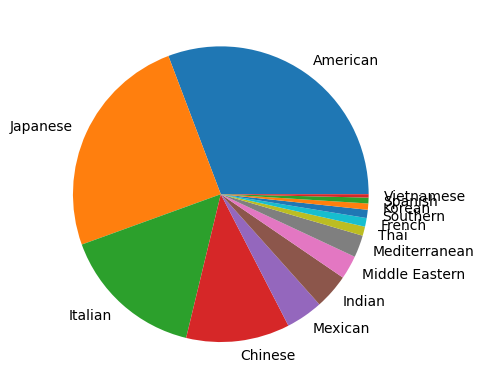

In [ ]:
# pie chart
ser = food_order.groupby('cuisine_type')['restaurant_name'].count()
ser = ser.sort_values(ascending=False)
plt.pie(food_order['cuisine_type'].value_counts(),labels= ser.index ,shadow=False)

### Let's make the pie a bit bigger just by increasing figsize and also use the autopct argument to show the percent value inside each piece of the pie
### Also using the wedgeprops and textprops arguments to style the wedges and texts for a wider border around each wedge and color it white; and increase the text size to be more readable.

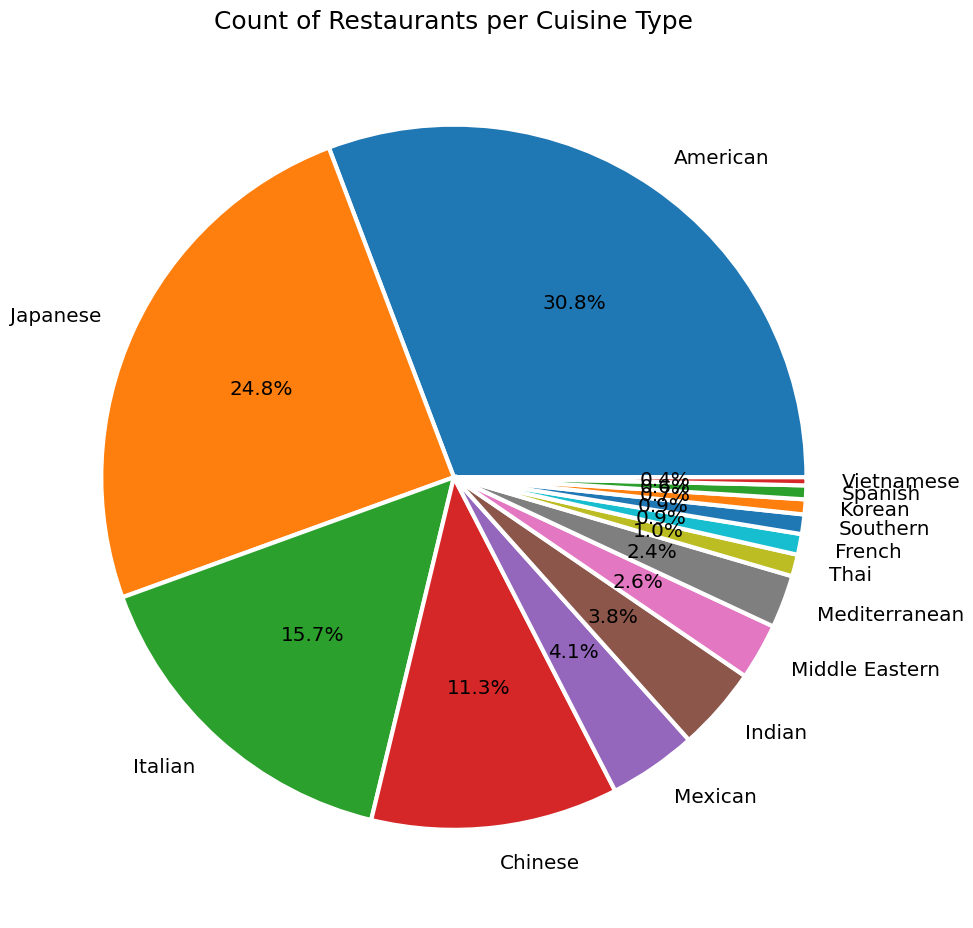

In [ ]:
# Making the pie bigger and more readable
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(food_order['cuisine_type'].value_counts(),labels=ser.index, autopct='%.1f%%',
  wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
  textprops={'size': 'x-large'})
ax.set_title('Count of Restaurants per Cuisine Type', fontsize=18)
plt.tight_layout()

(b) Show only the 5 cuisine types with most restaurants

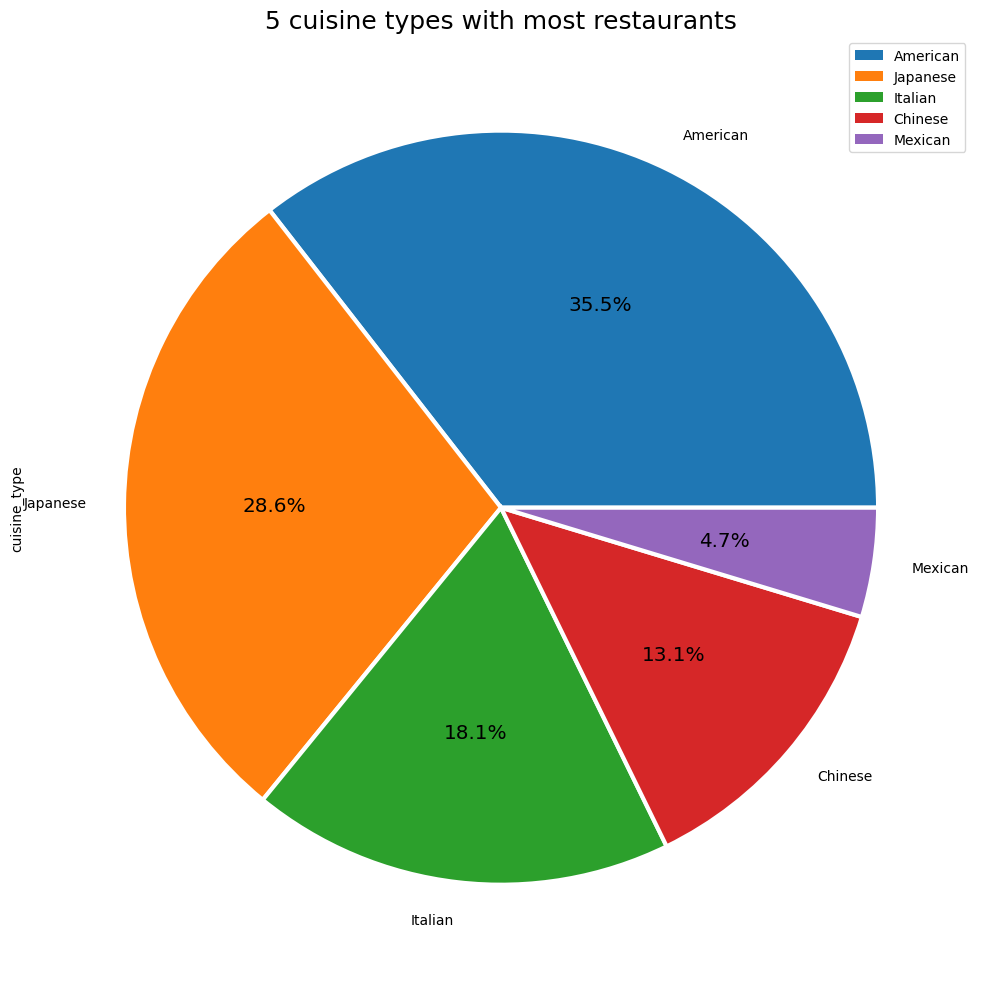

In [ ]:
# Displaying only 5 cuisine types with most restaurants
fig, ax = plt.subplots(figsize=(10, 10))
top_five = food_order['cuisine_type'].value_counts()
top_five.head(5).plot(kind='pie')
ax.pie(top_five.head(5), autopct='%.1f%%',
  wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
  textprops={'size': 'x-large'})
ax.legend()

ax.set_title('5 cuisine types with most restaurants', fontsize=18)
plt.tight_layout()

**Task 10**:
(a) Plot a graph that shows the 10 most popular restaurant name

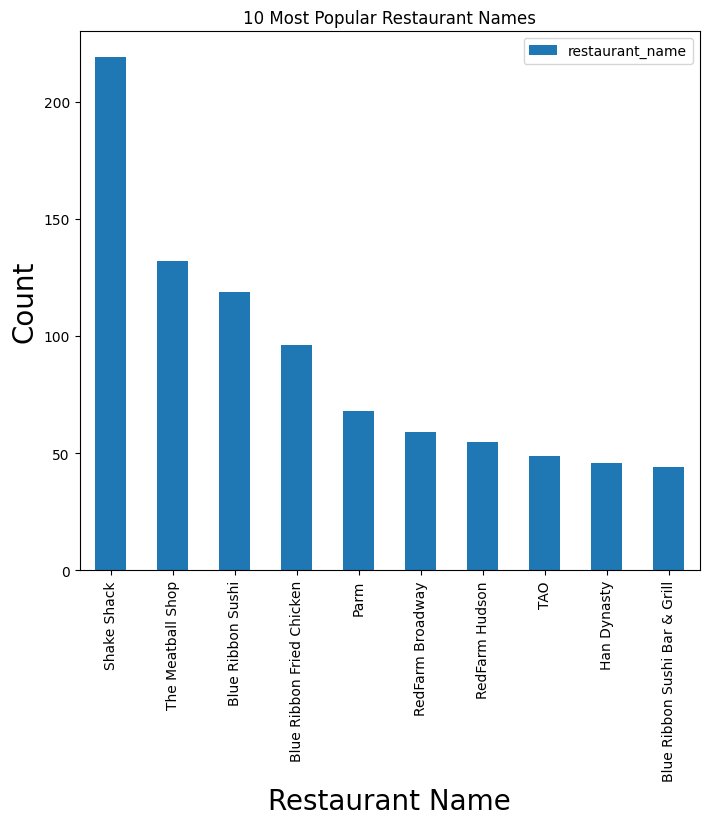

In [ ]:
# Showing the 10 most popular restaurant name in a bar chart
plt.figure(figsize=(8,7))
plt.title('10 Most Popular Restaurant Names')
plt.xlabel('Restaurant Name',fontsize=20)
plt.ylabel('Count',fontsize=20)
# Count the number of times each restaurant name appears
restaurant_counts = food_order['restaurant_name'].value_counts()
restaurant_counts[:10].plot(kind='bar')
plt.legend()
plt.show()

(b) Highlight the top 3

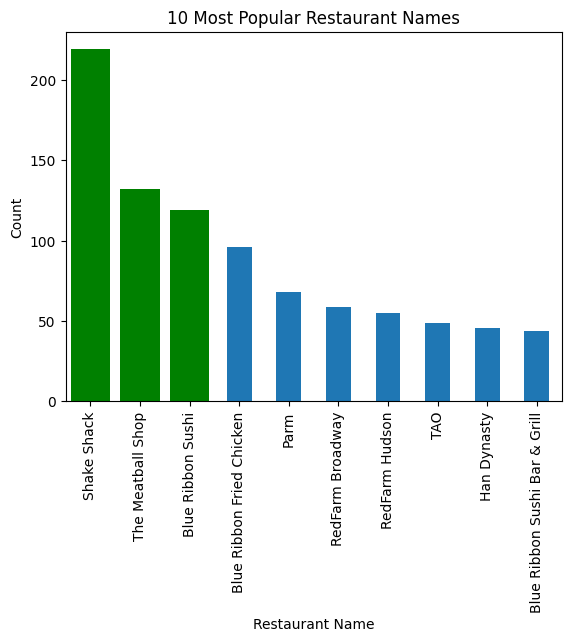

In [ ]:
# Count the number of times each restaurant name appears
restaurant_counts = food_order['restaurant_name'].value_counts()

# Plot the 10 most popular restaurant names
restaurant_counts[:10].plot(kind='bar')

# Highlight the top 3
for i in range(3):
	plt.gca().bar(i, restaurant_counts[i], color='green')

plt.title('10 Most Popular Restaurant Names')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.show()


**Task 11**: Plot a graph that shows the 10 most popular restaurants for each cuisine type and highlight the
top 3. If there if less than 10 restaurants for a particular cuisine type, just show the maximum number of
restaurants and highlight the top 3

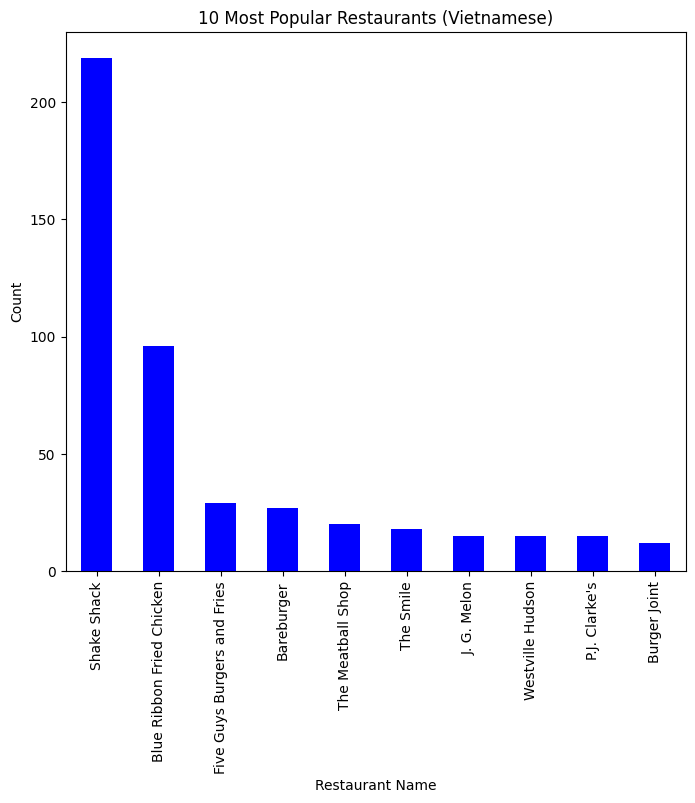

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


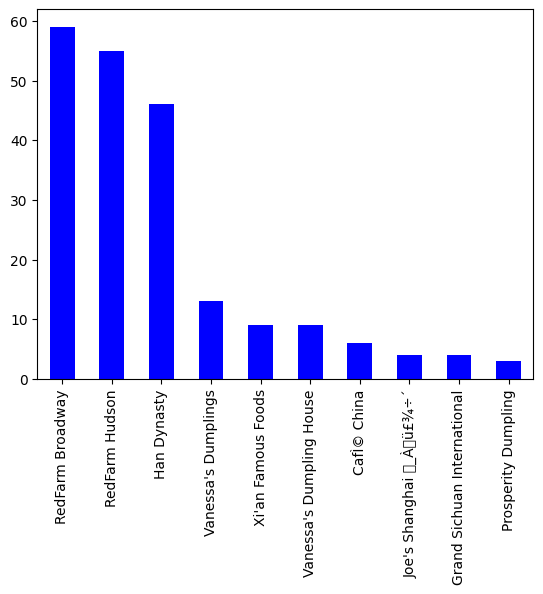

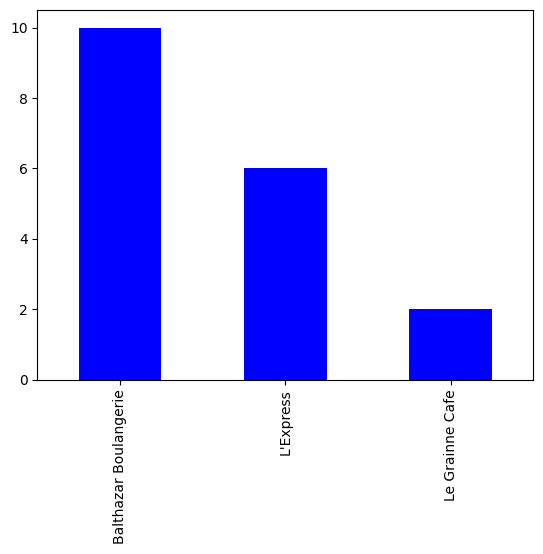

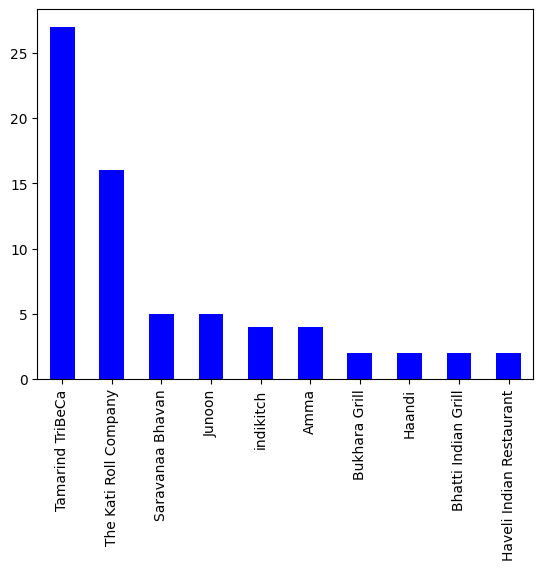

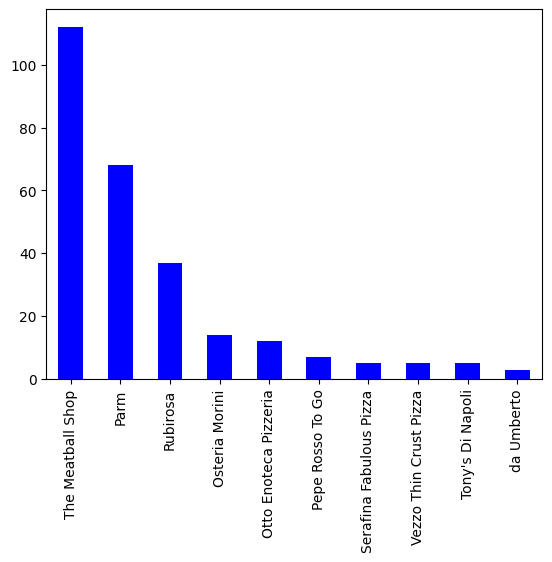

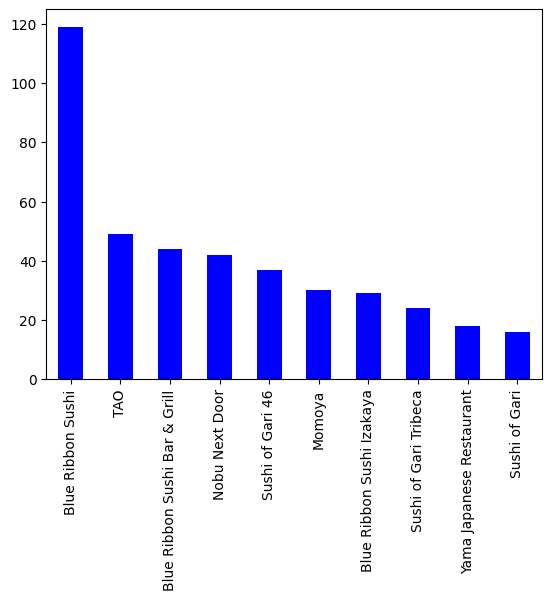

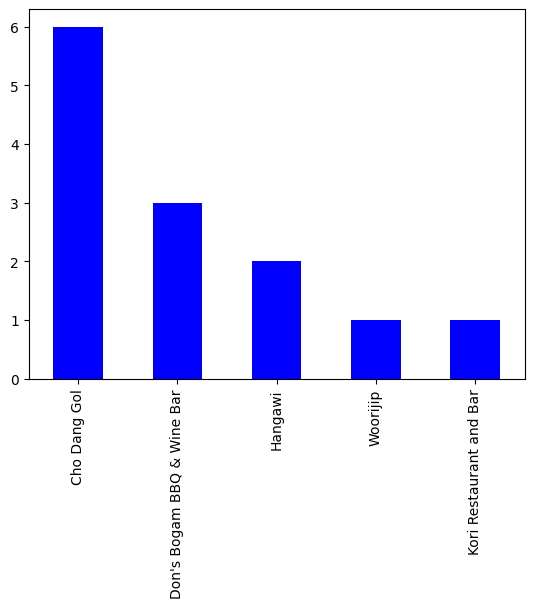

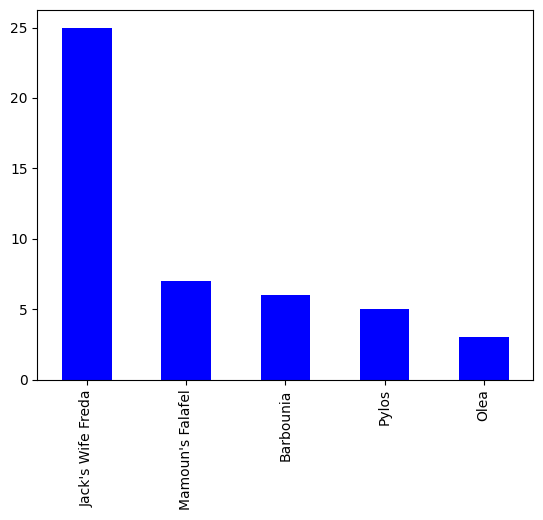

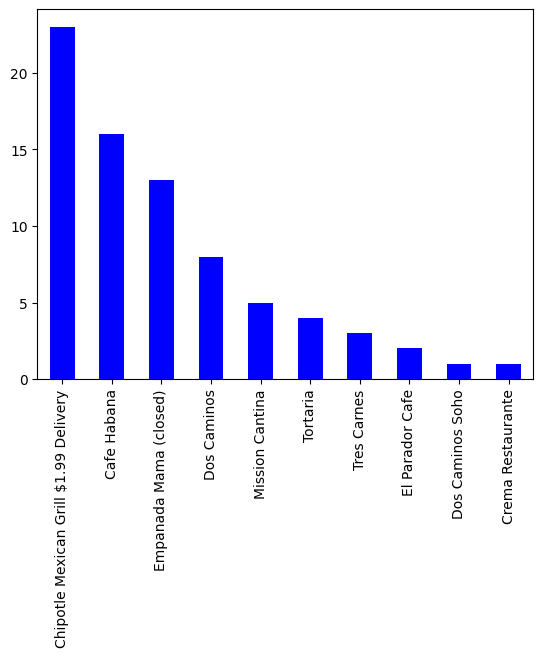

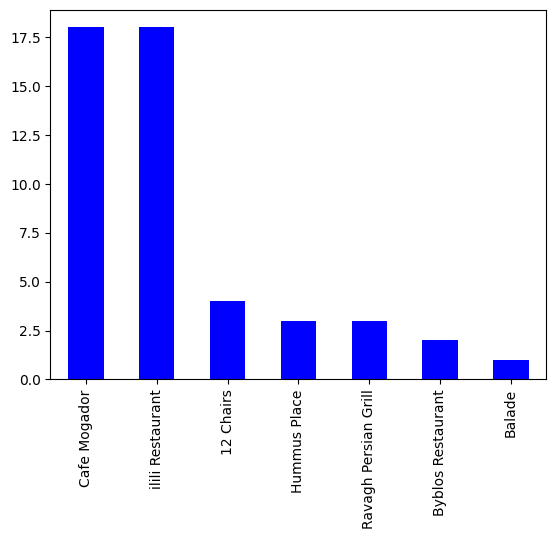

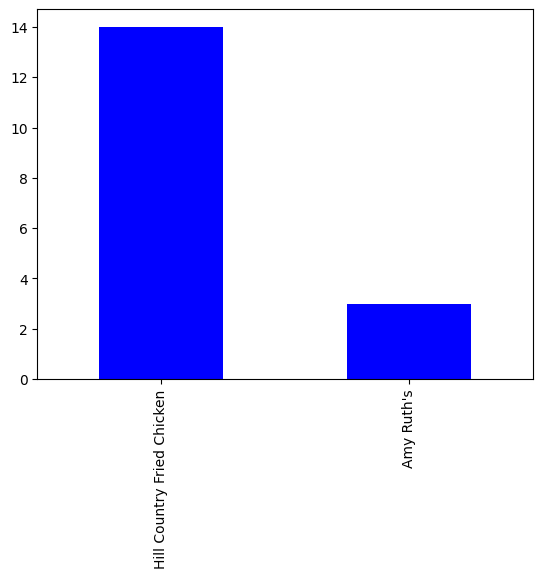

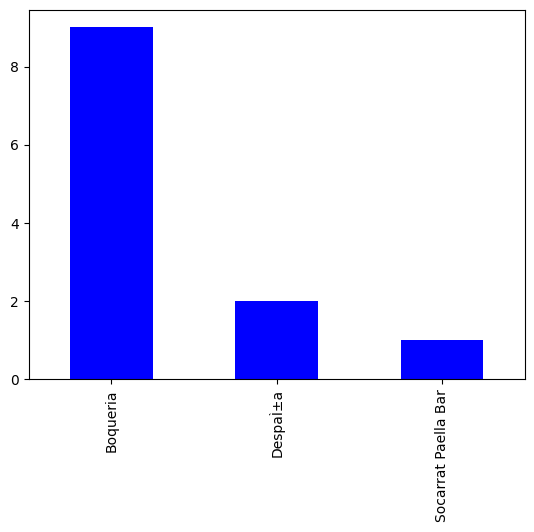

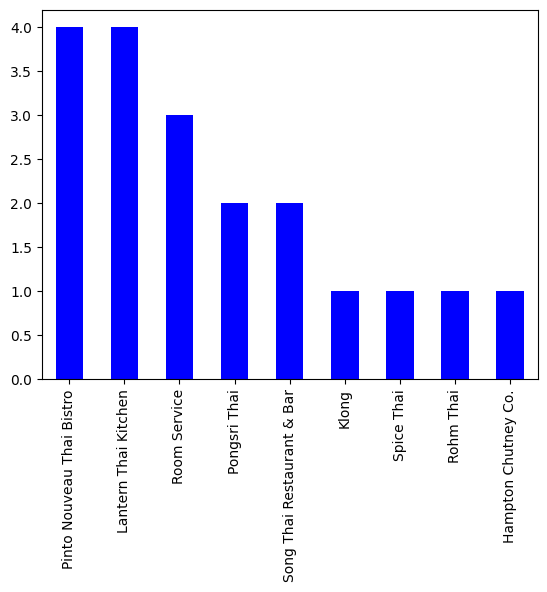

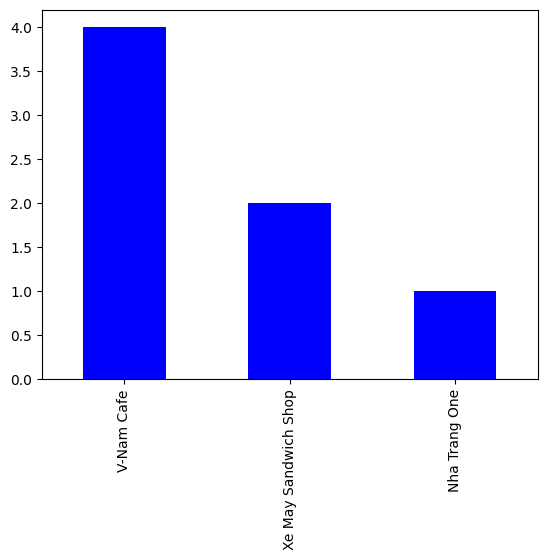

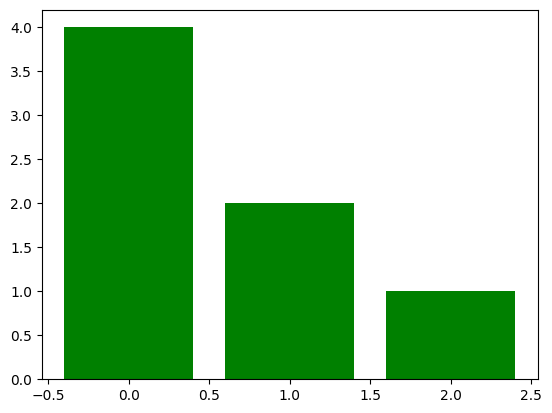

In [ ]:
# Showing the 10 most popular restaurant name for each cuisine type in a bar chart
plt.figure(figsize=(8,7))
plt.title(f'10 Most Popular Restaurants ({name})')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
# Group the data by cuisine type
grouped = food_order.groupby('cuisine_type')

# Plot the 10 most popular restaurants for each cuisine type
for name, group in grouped:
	restaurant_counts = group['restaurant_name'].value_counts()
	restaurant_counts[:10].plot(kind='bar', color='blue')
	plt.show()

 # Highlight the top 3
for i in range(3):
        plt.gca().bar(i, restaurant_counts[i], color='green')

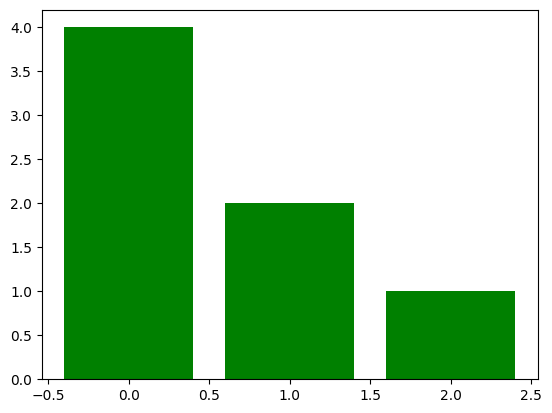

In [ ]:

 # Highlight the top 3
for i in range(3):
        plt.gca().bar(i, restaurant_counts[i], color='green')


**Task 12**:
(a) What is the proportion of reviews for Shake Shack?

In [ ]:
# Count the number of times Shake Shack appears in the restaurant name column
shake_shack_count = (food_order['restaurant_name'] == 'Shake Shack').sum()

# Calculate the proportion of reviews for Shake Shack
shake_shack_proportion = shake_shack_count / food_order.shape[0]
print(shake_shack_proportion)

0.11538461538461539


b) Use a pie chart to display your results.

In [ ]:
# Count the number of times Shake Shack appears in the restaurant name column
shake_shack_count = (food_order['restaurant_name'] == 'Shake Shack').sum()

# Calculate the proportion of reviews for Shake Shack
shake_shack_proportion = shake_shack_count / food_order.shape[0]

# Calculate the proportion of reviews for other restaurants
other_proportion = 1

shake_shack_proportion = shake_shack_proportion + other_proportion
shake_shack_proportion.plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Reviews for Shake Shack')
plt.show()

**Task 13**: Is there a link between ratings and food preparation time? Justify your answer. You may use an
appropriate graph

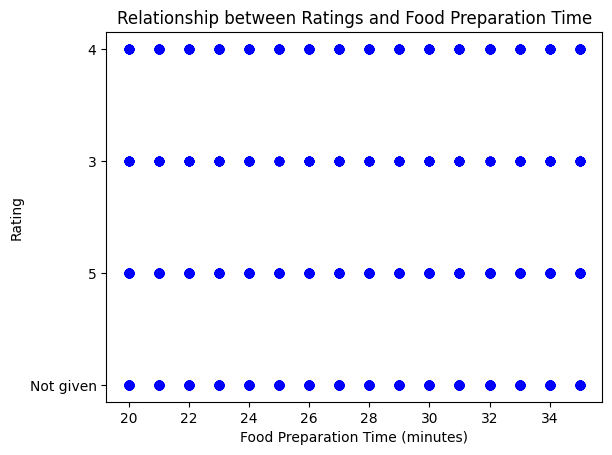

In [ ]:
# Plot a scatter plot of ratings vs food preparation time
plt.scatter(food_order['food_preparation_time'], food_order['rating'], color='blue')
plt.title('Relationship between Ratings and Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Rating')
plt.show()


Justifying the answer: To determine if there is a link between ratings and food preparation time, look at the scatter plot. If there is a clear pattern, such as a positive or negative correlation, then it can be said that there is a link between the two variables. If the points are scattered randomly, then it can be said that there is no link between the two variables.

In this case, the scatter plot does not show a clear pattern, indicating that there is no strong link between ratings and food preparation time. However, this does not mean that there is no relationship at all. Further analysis, such as regression analysis, may be needed to determine if there is a weak relationship between the two variables.


### Part 2
The aim of this part is to carry out sentiment analysis

### 2.1 Data Loading
**Task 1**: Load the dataset tweets.csv into a pandas DataFrame

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tweets.csv to tweets (5).csv


In [ ]:
tweets = pd.read_csv('tweets.csv')

**Task 2**: Display the last 10 rows of your dataset

In [ ]:
tweets.tail(10)

,Tweets,Retweets,Likes,Date,cleaned_tweet,sentiment
3050,@cybrtrkguy Vote them out,7712,68748,2022-01-27 23:41:28,Vote,neutral
3051,"If you scare people enough, they will demand r...",119804,543466,2022-01-27 23:39:57,scare people enough demand removal freedom pat...,neutral
3052,Seems odd that the UN still hasn’t released 20...,32799,262118,2022-01-27 22:24:24,Seems odd UN still hasn’t released 2020 world ...,negative
3053,@jayvasdigital Freedom is being stripped away ...,12348,63170,2022-01-27 22:05:43,Freedom stripped away one piece time gone,neutral
3054,@LimitingThe @baglino Manganese also requires ...,128,2543,2022-01-27 22:03:29,Manganese also requires less lithium operate...,positive
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,manganese alternative iron amp phosphorus sc...,neutral
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,Exactly,positive
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,policies directly responsible outrageously hi...,positive
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,voted office,neutral
3059,CB radios are free from govt/media control,11302,113429,2022-01-27 21:00:09,CB radios free govtmedia control,positive


### 2.2 Data Cleaning
An important step in Data Science is to clean data. In this sub part, you will be preparing the dataset for future
analysis. You might want to use the libraries re and TextBlob for this part. Complete these tasks and store the
cleaned tweet in a column called **cleaned tweet**.
regex: https://docs.python.org/3/library/re.html
TextBlob: https://textblob.readthedocs.io/en/dev/

**Task 3**: Remove hyperlinks

In [ ]:
# getting the columns of the dataset
columns = list(tweets.columns)
columns

['Tweets', 'Retweets', 'Likes', 'Date']

In [ ]:
# examining missing values
print("Missing values distribution: ")
print(tweets.isnull().mean())
print("")

Missing values distribution: 
Tweets      0.0
Retweets    0.0
Likes       0.0
Date        0.0
dtype: float64



In [ ]:
# check datatype in each column
print("Column datatypes: ")
print(tweets.dtypes)

Column datatypes: 
Tweets      object
Retweets     int64
Likes        int64
Date        object
dtype: object


In [ ]:
import re

In [ ]:
print(tweets)


                                                 Tweets  Retweets   Likes  \
0                                 @PeterSchiff 🤣 thanks       209    7021   
1                                 @ZubyMusic Absolutely       755   26737   
2      Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                           @BillyM2k 👻       802   19353   
4        Meeting a lot of cool people at Twitter today!      9366  195546   
...                                                 ...       ...     ...   
3055  @LimitingThe @baglino Just that manganese is a...       171    3173   
3056              @incentives101 @ICRicardoLara Exactly       145    4234   
3057  @ICRicardoLara Your policies are directly resp...       421    6144   
3058   @ICRicardoLara You should be voted out of office       484    7029   
3059         CB radios are free from govt/media control     11302  113429   

                     Date  
0     2022-10-27 16:17:39  
1     2022-10-27 13

In [ ]:
# removing hyperlink
tweets = re.sub("https?:\/\/[a-z0-9-]+(?:\.[a-z0-9-]+)+[/?#]\S*", "", str(tweets['Tweets']))
print(tweets)

0                                   @PeterSchiff 🤣 thanks
1                                   @ZubyMusic Absolutely
2        Dear Twitter Advertisers 
3                                             @BillyM2k 👻
4          Meeting a lot of cool people at Twitter today!
                              ...                        
3055    @LimitingThe @baglino Just that manganese is a...
3056                @incentives101 @ICRicardoLara Exactly
3057    @ICRicardoLara Your policies are directly resp...
3058     @ICRicardoLara You should be voted out of office
3059           CB radios are free from govt/media control
Name: Tweets, Length: 3060, dtype: object


**Task 4**: Remove stopwords. Stopwords are the words in any language which does not add much meaning to a
sentence. They can safely be ignored without sacrificing the meaning of the sentence

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stop_words)

{'hers', "shouldn't", 'mustn', 'wouldn', 'this', 'with', 'too', 'have', 'ourselves', "you're", 'of', 'how', 'he', 'did', 'down', "hadn't", 't', 'own', "should've", "that'll", 'having', 'before', 'm', 'o', 'all', 'as', 'are', 'who', 'shan', "wasn't", 'won', 'out', 'same', 'nor', "she's", 'above', 'herself', 've', 'because', 'once', 'these', 'such', 'we', 'me', 'there', 'what', "didn't", "mightn't", 'its', 'not', 'their', 'do', 'only', 'y', "won't", 'theirs', 're', 'isn', 'and', 'very', 'until', "weren't", 'our', 'then', 'at', "you'll", 'further', 'if', 'aren', 'itself', 'in', 'on', 'yours', 'again', 'some', 'which', 'under', 'will', 'needn', "needn't", 'my', 'you', 'be', 'by', 'was', 'into', 'it', "you've", 'that', 'up', 'over', 'weren', 'her', 'can', "it's", 'hasn', "aren't", 'mightn', 'ma', 'each', 'didn', "don't", 'now', "you'd", 'few', 'll', 'yourselves', 'so', 'a', 'when', 'had', 'doing', 'him', 'been', 'any', 'against', "shan't", 'your', 'being', 'or', 'no', 'for', 'don', 'ain', "

In [ ]:
# removing stopwords
tweets = " ".join([word for word in tweets.split() if word not in stop_words])

In [ ]:
print(tweets)

0 @PeterSchiff 🤣 thanks 1 @ZubyMusic Absolutely 2 Dear Twitter Advertisers 3 @BillyM2k 👻 4 Meeting lot cool people Twitter today! ... 3055 @LimitingThe @baglino Just manganese a... 3056 @incentives101 @ICRicardoLara Exactly 3057 @ICRicardoLara Your policies directly resp... 3058 @ICRicardoLara You voted office 3059 CB radios free govt/media control Name: Tweets, Length: 3060, dtype: object


**Task 5**: Remove mentions. Here you want to remove the symbol ’@’ and the word that comes after it

In [ ]:
# removing mentions and the word that comes after it
tweets = re.sub("@\S+", "", tweets)
print(tweets)

0  🤣 thanks 1  Absolutely 2 Dear Twitter Advertisers 3  👻 4 Meeting lot cool people Twitter today! ... 3055   Just manganese a... 3056   Exactly 3057  Your policies directly resp... 3058  You voted office 3059 CB radios free govt/media control Name: Tweets, Length: 3060, dtype: object


**Task 6**: Remove the hashtag. Here you want to remove the symbol ’#’ and keep the text that comes after it

In [ ]:
# removing hashtags
# we just remove the '#' and keep the word that comes after
tweets = re.sub("#", "", tweets)
print(tweets)

0  🤣 thanks 1  Absolutely 2 Dear Twitter Advertisers 3  👻 4 Meeting lot cool people Twitter today! ... 3055   Just manganese a... 3056   Exactly 3057  Your policies directly resp... 3058  You voted office 3059 CB radios free govt/media control Name: Tweets, Length: 3060, dtype: object


**Task 7**: Remove punctuation signs

In [ ]:
# removing punctuation
#The first two arguments for string.translate method is empty strings, and the third input is a Python list of the punctuation that should be removed.
import string
tweets = tweets.translate(str.maketrans('', '', string.punctuation))
print(tweets)

0  🤣 thanks 1  Absolutely 2 Dear Twitter Advertisers 3  👻 4 Meeting lot cool people Twitter today  3055   Just manganese a 3056   Exactly 3057  Your policies directly resp 3058  You voted office 3059 CB radios free govtmedia control Name Tweets Length 3060 dtype object


**Task 8**: Remove the word ”RT”

In [ ]:
tweets = re.sub(r"RT", "", tweets)
print(tweets)

0  🤣 thanks 1  Absolutely 2 Dear Twitter Advertisers 3  👻 4 Meeting lot cool people Twitter today  3055   Just manganese a 3056   Exactly 3057  Your policies directly resp 3058  You voted office 3059 CB radios free govtmedia control Name Tweets Length 3060 dtype object


**Task 9**: Remove emojis

ASCII formats emojis and other non-ASCII characters as Unicode. Essentially, Unicode is a universal character encoding standard in which each character and symbol in all languages are assigned a code. Unicode is required because it is the only encoding standard that allows us to retrieve or join data using a variety of different languages but the issue is… It’s unreadable in ASCII format.

In [ ]:
# removing emojis
# encoding the text to ASCII format
tweets_encode = tweets.encode(encoding="ascii", errors="ignore")
# decoding the text
tweets_decode = tweets_encode.decode()

def remove_emojis(tweets):
	emoji_pattern = re.compile("["
    	u"\U0001F600-\U0001F64F"  # emoticons
    	u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    	u"\U0001F680-\U0001F6FF"  # transport & map symbols
    	u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       	"]+", flags=re.UNICODE)
	tweets = emoji_pattern.sub(r'', tweets)
	return tweets
print(tweets)



0  🤣 thanks 1  Absolutely 2 Dear Twitter Advertisers 3  👻 4 Meeting lot cool people Twitter today  3055   Just manganese a 3056   Exactly 3057  Your policies directly resp 3058  You voted office 3059 CB radios free govtmedia control Name Tweets Length 3060 dtype object


**Task 10**: Remove leading and trailing whitespaces

In [ ]:
# encoding the text to ASCII format
tweets_encode = tweets.encode(encoding="ascii", errors="ignore")
# decoding the text
tweets_decode = tweets_encode.decode()
# cleaning the text to remove extra whitespace
tweets = " ".join([word for word in tweets_decode.split()])
print(tweets)

0 thanks 1 Absolutely 2 Dear Twitter Advertisers 3 4 Meeting lot cool people Twitter today 3055 Just manganese a 3056 Exactly 3057 Your policies directly resp 3058 You voted office 3059 CB radios free govtmedia control Name Tweets Length 3060 dtype object


**Task 11**: Apply lemmatization on every word

#####Lemmatization is the process of converting a word to its base form.
#####In order to lemmatize, we need to create an instance of the **WordNetLemmatizer()** and call the lemmatize() function on a single word.
#####We first tokenize the sentence into words using nltk.word_tokenize and then we will call lemmatizer.lemmatize() on each word. This can be done in a list comprehension

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer


In [ ]:
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the data to be lemmatized
import string

# Tokenize: Split the sentence into words
import nltk
nltk.download('punkt')

word_list = nltk.word_tokenize(str(tweets))
print(word_list)


# Lemmatize list of words and join
import nltk
nltk.download('wordnet')
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print(lemmatized_output)


['0', 'thanks', '1', 'Absolutely', '2', 'Dear', 'Twitter', 'Advertisers', '3', '4', 'Meeting', 'lot', 'cool', 'people', 'Twitter', 'today', '3055', 'Just', 'manganese', 'a', '3056', 'Exactly', '3057', 'Your', 'policies', 'directly', 'resp', '3058', 'You', 'voted', 'office', '3059', 'CB', 'radios', 'free', 'govtmedia', 'control', 'Name', 'Tweets', 'Length', '3060', 'dtype', 'object']
0 thanks 1 Absolutely 2 Dear Twitter Advertisers 3 4 Meeting lot cool people Twitter today 3055 Just manganese a 3056 Exactly 3057 Your policy directly resp 3058 You voted office 3059 CB radio free govtmedia control Name Tweets Length 3060 dtype object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The above code is a simple one with some grammatical errors. This can be corrected if we provide the correct **‘part-of-speech’ tag (POS tag)** as the second argument to lemmatize().

Sometimes, the same word can have a multiple lemmas based on the meaning or context.

In [ ]:
# find out the correct POS tag for each word, map it to the right input character that the WordnetLemmatizer accepts and pass it as the second argument to lemmatize()
nltk.download('averaged_perceptron_tagger')
print(nltk.pos_tag(nltk.word_tokenize(str(tweets))))

[('0', 'CD'), ('thanks', 'NNS'), ('1', 'CD'), ('Absolutely', 'RB'), ('2', 'CD'), ('Dear', 'NNP'), ('Twitter', 'NNP'), ('Advertisers', 'NNP'), ('3', 'CD'), ('4', 'CD'), ('Meeting', 'NN'), ('lot', 'NN'), ('cool', 'JJ'), ('people', 'NNS'), ('Twitter', 'VBP'), ('today', 'NN'), ('3055', 'CD'), ('Just', 'NNP'), ('manganese', 'FW'), ('a', 'DT'), ('3056', 'CD'), ('Exactly', 'RB'), ('3057', 'CD'), ('Your', 'PRP$'), ('policies', 'NNS'), ('directly', 'RB'), ('resp', 'VBP'), ('3058', 'CD'), ('You', 'PRP'), ('voted', 'VBD'), ('office', 'NN'), ('3059', 'CD'), ('CB', 'NNP'), ('radios', 'NNS'), ('free', 'JJ'), ('govtmedia', 'NNS'), ('control', 'NN'), ('Name', 'NNP'), ('Tweets', 'NNP'), ('Length', 'NNP'), ('3060', 'CD'), ('dtype', 'NN'), ('object', 'NN')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


# Init Lemmatizer
lemmatizer = WordNetLemmatizer()

#word = str(tweets['Tweets'])

# Lemmatize a Sentence with the appropriate POS tag
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize((str(tweets)))])

***spaCy Lemmatization ***is a relatively new in the space and is billed as an industrial strength NLP engine making the tweets easily readable.
#####spaCy determines the part-of-speech tag by default and assigns the corresponding lemma. It comes with a bunch of prebuilt models where we download 'en_core_web_sm' that is one of the standard ones for english.

In [ ]:
# Install spaCy (run in terminal/prompt)
import sys
!{sys.executable} -m pip install spacy

# Download spaCy's  'en_core_web_sm' Model
!{sys.executable} -m spacy download en

In [ ]:
import spacy

# Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Parse the sentence using the loaded 'en' model object `nlp`
doc = nlp(str(tweets))

# Extract the lemma for each token and join
" ".join([token.lemma_ for token in doc])

**Task 12**: Store the cleaned tweet in a new column called tweet_cleaned

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
# Reattach the tweets.csv afresh for Task 12

Saving tweets.csv to tweets (6).csv


In [ ]:
# Load the tweets into a DataFrame
tweets = pd.read_csv('tweets.csv')

In [ ]:
import pandas as pd
import re
import string

# Define the function cleanTweets here
def cleanTweets(tweet):
    # Perform the cleaning operations on the tweet

    stop_words = set(stopwords.words("english"))  # define stop words

    tweet = " ".join([word for word in tweet.split() if word.lower() not in stop_words])

    tweet_encode = tweet.encode(encoding="ascii", errors="ignore")
    tweet_decode = tweet_encode.decode()
    new_tweet = " ".join([word for word in tweet_decode.split()])

    tweet = re.sub(r"http\S+", "", tweet)  # use a more complete regular expression to remove URLs
    tweet = re.sub("@\S+", "", tweet)
    tweet = re.sub("#", "", tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    tweet_cleaned = tweet
    return tweet_cleaned

# Load the tweets into a DataFrame
tweets = pd.read_csv('tweets.csv')

# Create a new column for cleaned tweets
tweets['tweet_cleaned'] = tweets['Tweets'].apply(cleanTweets)

# Print the first 5 rows of the DataFrame with cleaned tweets
print(tweets.head())

### 2.3 Sentiment Analysis
Sentiment Analysis is process of classifying text into categories- positive, negative or neutral. One way to do
this is by manual annotation. However, we would not do that in this assignment

**Task 13**:
(a) Can you think of reasons why we would or would not manually annotate our whole dataset

Data annotation can be done manually by a human. Manually annotating a tweet, will ensure that we understand what is happening in a tweet after we've read it. Humans can label data on both simple and hard cases and are able to handle most complex and hardest cases. Human annotators are frequently used to gather information for sentiment analysis since they can evaluate mood and filter content across all web platforms, including social media and e-commerce sites. Then they can tag and report on keywords that are profane, sensitive, or neologism.
We would manually annotate a dataset to create a training set for machine learning models and to gain a deeper understaning of the data.

However, manually annotating data requires a lot of effort, and we also need to maintain the quality of the data. Human errors can lead to poor data quality, and these have a direct impact on the prediction of AI/ML models and accuracy of annotation. If errors is completely avoided human accuracy ensures high-quality results when manually labeling data; however, this method is labour-intensive, expensive, and time-consuming. It may also not be feasible to manually annotate for large datasets.



(b) Can you propose alternative ways to do this?



Alternative ways to annotate data is by automatically using advanced machine learning algorithms and tools. While automated data labeling can save significant time and resources, its accuracy is not always guaranteed. However, human annotation is typically more accurate especially for complex dataset, although being significantly more expensive.

Best practices for data annotation is to use a combination of machine learning algorithms (data annotation software) with a human-in-the-loop approach to help humans focus on the hardest cases and increase the diversity of the training dataset. Labeling data that the machine learning model can correctly process has limited value.

Other alternative ways include using pre-trained models such as TextBlob or Vader; and using deep learning techniques such as LSTMs or Convolutional Neural Networks (CNNs).

Instead of manual annotation, we would first calculate the Polarity of each tweet. In a nutshell, polarity measures how positive and how negative a text is.

**Task 14**: Add a column sentiment to the dataframe. If the polarity is > 0, the sentiment is positive. If it is < 0, the sentiment is negative. Else, the sentiment is neutral.

In [ ]:
from textblob import TextBlob

# Create a function to get the polarity
def getPolarity ( tweets ):
  return TextBlob ( tweets ) . sentiment . polarity


In [ ]:
# Define the function getSentiment here
def getSentiment(tweet):
    # Get the polarity of the tweet using TextBlob
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity

    # Classify the sentiment based on the polarity
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    return sentiment

# Load the tweets into a DataFrame
tweets = pd.read_csv('tweets.csv')

# Create a new column for cleaned tweets
tweets['cleaned_tweet'] = tweets['Tweets'].apply(cleanTweets)

# Create a new column for sentiment
tweets['sentiment'] = tweets['cleaned_tweet'].apply(getSentiment)

# Print the first 5 rows of the DataFrame with cleaned tweets and sentiment
print(tweets.head())

**Task 15**: Use an appropriate plot(s) to show how sentiment is distributed in the dataset?
#####**Question**: Comment on this

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the tweets into a DataFrame
tweets = pd.read_csv('tweets.csv')

# Create a new column for cleaned tweets
tweets['cleaned_tweet'] = tweets['Tweets'].apply(cleanTweets)

# Create a new column for sentiment
tweets['sentiment'] = tweets['cleaned_tweet'].apply(getSentiment)
# Count the number of tweets for each sentiment
sentiment_counts = tweets['sentiment'].value_counts()

# Create a bar chart of sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.title('Sentiment Distribution')
plt.show()

From here, we can see that most of the tweets are neutral. Visualizing the sentiment distribution in the dataset can help us gain a better understanding of the overall tone of the tweets. The tweets also has a high distribution of positive comments and only a small percentage of the distribution has negative comments.

This is useful in various contexts, such as marketing, brand management, or sentiment analysis research. It can also help identify potential issues or opportunities in a business or organization. For this dataset, customers are just okay with the services they are getting. The company needs to improve on their services so as to wow customers to give ratings that will give more positive sentiments. Overall, clients are happy.

**Task 16**:
(a) What are the 10 most common words in each sentiment?

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter

# Load the tweets into a DataFrame
tweets = pd.read_csv('tweets.csv')

# Create a new column for cleaned tweets
tweets['cleaned_tweet'] = tweets['Tweets'].apply(cleanTweets)

# Create a new column for sentiment
tweets['sentiment'] = tweets['cleaned_tweet'].apply(getSentiment)

# Separate dataframes for each sentiment category
positive_tweets = tweets[tweets['sentiment'] == 'positive']
negative_tweets = tweets[tweets['sentiment'] == 'negative']
neutral_tweets = tweets[tweets['sentiment'] == 'neutral']

# Concatenate all the cleaned tweets for each sentiment category into a single string
positive_string = ' '.join(positive_tweets['cleaned_tweet'].tolist())
negative_string = ' '.join(negative_tweets['cleaned_tweet'].tolist())
neutral_string = ' '.join(neutral_tweets['cleaned_tweet'].tolist())

# Tokenize the strings and count the frequency of each word
positive_words = Counter(word_tokenize(positive_string.lower()))
negative_words = Counter(word_tokenize(negative_string.lower()))
neutral_words = Counter(word_tokenize(neutral_string.lower()))

# Create a dataframe of the top 10 most common words and their frequency for each sentiment category
top_positive_words = pd.DataFrame(positive_words.most_common(10), columns=['word', 'frequency'])
top_negative_words = pd.DataFrame(negative_words.most_common(10), columns=['word', 'frequency'])
top_neutral_words = pd.DataFrame(neutral_words.most_common(10), columns=['word', 'frequency'])

# Print the results
print('Top 10 most common words in positive tweets:')
print(top_positive_words)
print('\nTop 10 most common words in negative tweets:')
print(top_negative_words)
print('\nTop 10 most common words in neutral tweets:')
print(top_neutral_words)

(b) Use an appropriate plot(s) to visualize this

In [ ]:
from collections import Counter
# Plot the top 10 most common words for each sentiment category
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.bar(top_positive_words['word'], top_positive_words['frequency'], color='green')
ax1.set_title('Top 10 most common words in positive tweets')
ax1.set_xticklabels(top_positive_words['word'], rotation=45, ha='right')
ax2.bar(top_negative_words['word'], top_negative_words['frequency'], color='red')
ax2.set_title('Top 10 most common words in negative tweets')
ax2.set_xticklabels(top_negative_words['word'], rotation=45, ha='right')
ax3.bar(top_neutral_words['word'], top_neutral_words['frequency'], color='grey')
ax3.set_title('Top 10 most common words in neutral tweets')
ax3.set_xticklabels(top_neutral_words['word'], rotation=45, ha='right')
plt.show()

**Question**: Comment on this

The plot shows the top 10 most common words in each sentiment category. We can observe that the most common words in the positive sentiment are related to positivity, such as "good", "much", and "true". In the negative sentiment, the most common words are related to bad, such as "bad", "one", and "also". The neutral sentiment has a mix of words related to both positive and negative sentiments, such as "yes", "yeah". Overall, this plot provides insights into the topics and themes that are prevalent in each sentiment category.

Some words however, appear in all sentiment like "tesla", "amp", some punctuations and letters which were meant to have been removed during data cleansing.

**Task 17**: Use an appropriate plot to show the number of Likes and Retweets per sentiment.

A suitable plot to visualize the number of Likes and Retweets per sentiment is a grouped bar chart. Will create it using the seaborn library in Python

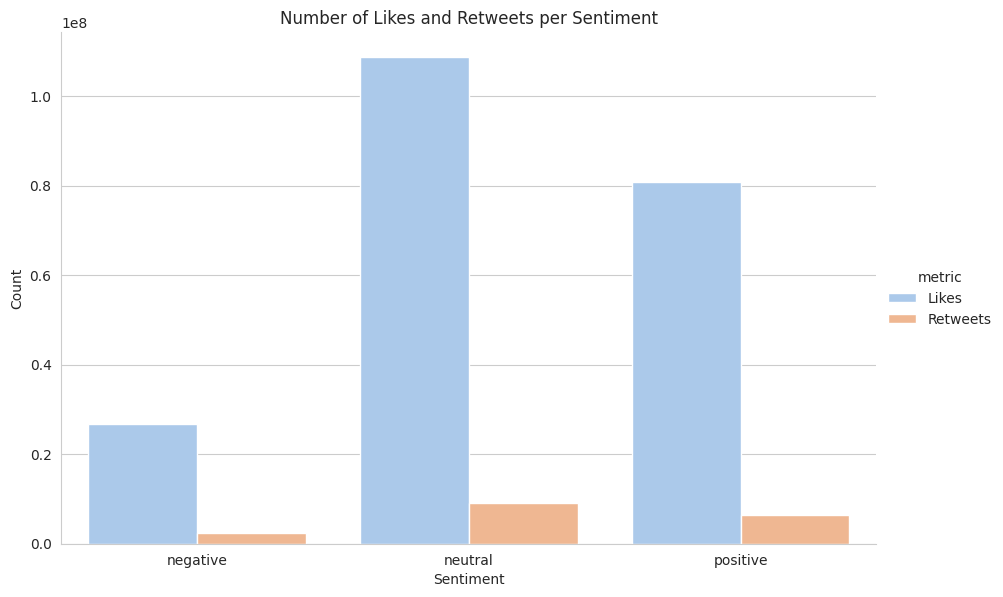

In [ ]:
import seaborn as sns

# Create a new DataFrame with columns for sentiment, Likes, and Retweets
likes_retweets = tweets.groupby('sentiment')[['Likes', 'Retweets']].sum().reset_index()

# Melt the DataFrame to create a long-form version that can be plotted
melted = pd.melt(likes_retweets, id_vars=['sentiment'], var_name='metric', value_name='count')

# Create a bar chart using the melted DataFrame
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.catplot(x='sentiment', y='count', hue='metric', data=melted, kind="bar", height=6, aspect=1.5)

# Set the plot title and axis labels
plt.title("Number of Likes and Retweets per Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Display the plot
plt.show()


**Question**: Comment on this

The neutral sentiment has the highest distribution for both Likes and Retweets showing there are more neutral and positive tweets than negative tweets.